In [2]:
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = load_breast_cancer(as_frame=True).frame

In [4]:
X = df.drop('target',axis=1)
y = df.target

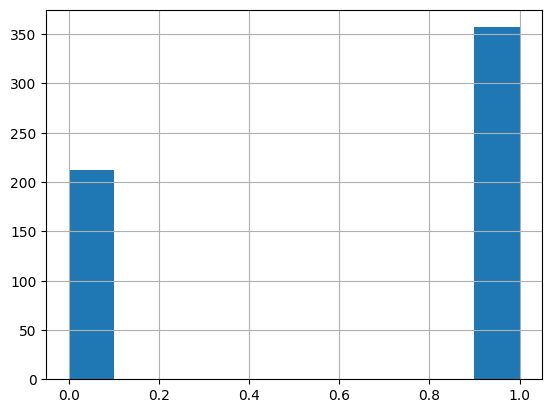

In [5]:
y.hist();

`stratify - работает только в задачах класификации и мультиклассовых`

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model.add(Dense(128, activation='relu', input_dim=X_train.shape[1])) `# полносвязный скрытый слой `

`128 `- количество нейронов  

`activation`='relu' - функция активации 

`input_dim=X_train.shape[1]` - входная размерность, что наша нейронная сеть будет принимать на входе КОЛ-ВО СТОЛБЦОВ

In [7]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1])) # полносвязный скрытый слой 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

<Axes: >

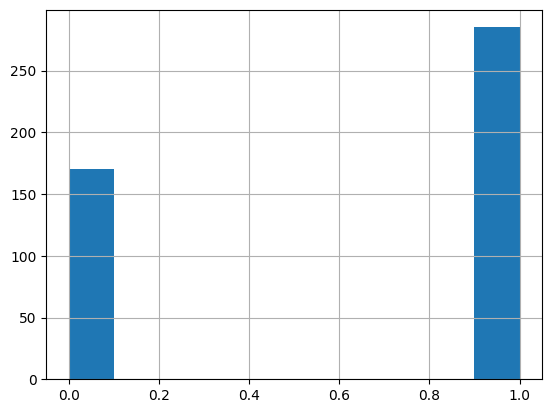

In [8]:
y_train.hist()

In [9]:
from sklearn.utils import class_weight

# Получение весов классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1.33823529, 0.79824561])

In [10]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/20
2/2 [==============================] - 1s 144ms/step - loss: 0.5752 - accuracy: 0.7670 - val_loss: 0.5052 - val_accuracy: 0.8772
Epoch 2/20
2/2 [==============================] - 0s 24ms/step - loss: 0.4481 - accuracy: 0.9209 - val_loss: 0.4211 - val_accuracy: 0.9035
Epoch 3/20
2/2 [==============================] - 0s 26ms/step - loss: 0.3611 - accuracy: 0.9407 - val_loss: 0.3572 - val_accuracy: 0.9035
Epoch 4/20
2/2 [==============================] - 0s 27ms/step - loss: 0.2995 - accuracy: 0.9495 - val_loss: 0.3069 - val_accuracy: 0.9123
Epoch 5/20
2/2 [==============================] - 0s 29ms/step - loss: 0.2529 - accuracy: 0.9560 - val_loss: 0.2669 - val_accuracy: 0.9123
Epoch 6/20
2/2 [==============================] - 0s 28ms/step - loss: 0.2174 - accuracy: 0.9582 - val_loss: 0.2350 - val_accuracy: 0.9298
Epoch 7/20
2/2 [==============================] - 0s 71ms/step - loss: 0.1894 - accuracy: 0.9560 - val_loss: 0.2094 - val_accuracy: 0.9298
Epoch 8/20
2/2 [==========

In [11]:
# Получение значений лосса и валидационного лосса из истории
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    # Построение графика лосса и валидационного лосса
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()

C:\Users\Mi\AppData\Local\Temp\ipykernel_14624\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


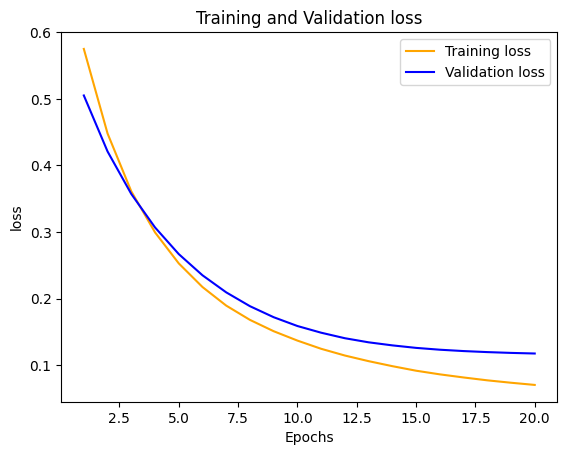

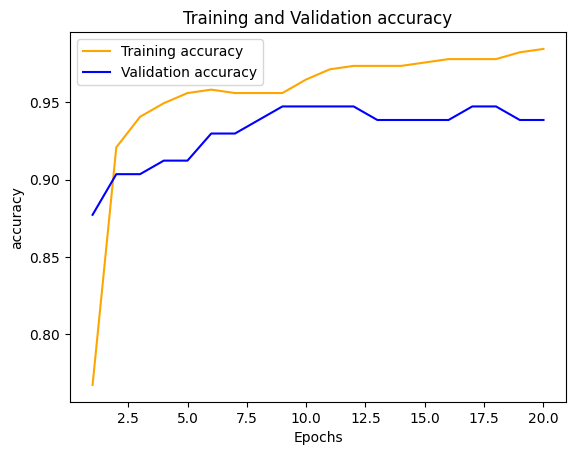

In [12]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [ ]:
from keras.layers import Dense, BatchNormalization, Dropout

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [ ]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]})

In [ ]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [ ]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]})

In [ ]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [ ]:
model.predict(X_val)

In [ ]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

In [ ]:
print(classification_report(y_val, np.round(y_pred)))

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [ ]:
model = create_model()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
save_best_weights = ModelCheckpoint(filepath='./',
                                    save_weights_only=True,
                                    monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True)

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]},
           callbacks=[early_stopping,save_best_weights])

In [ ]:
model.load_weights("./")

In [ ]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, y_pred)